<center>
<img src="https://raw.githubusercontent.com/dvgodoy/PyTorch101_ODSC_Europe2020/master/images/linear_dogs.jpg" height="400" width="800"> 

# Глубокое обучение и вообще: домашнее задание 1
</center>

**ФИО:**

**Факт о себе:**

## Общая информация

__Дата выдачи:__ 06.02.2023

__Мягкий дедлайн:__ 23:59MSK 26.02.2023

__Жесткий дедлайн:__ 23:59MSK 05.03.2023

## О задании

Это задание будет состоять из нескольких частей.

- __[2 балла]__ В первой части вы попробуете попрактиковаться в работе с тензорами.
- __[2.5 балла]__ Во второй части вы напишите на pytorch свою собственную логистическую регрессию. 
- __[5.5 балла]__ В третьей части вы немного поупражняетесь с нейросетками на табличных встроенных в pytorch данных.
- __[2 балла]__ Четвёртая часть будет бонусной. В ней вам будет предложено реализовать несколько различных вариаций градиентного спуска. 

Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании. 

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12 баллов. За каждый день просрочки после мягкого дедлайна снимается 1 балл. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее. Мягкий дедлайн можно отодвинуть, воспользовавшись **late days policy** (см подробнее [на страничке курса).](https://github.com/FUlyankin/deep_learning_pytorch) 

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

## Формат сдачи

Задания сдаются через google-форму. Она будет опубликована на [странице курса.](https://github.com/FUlyankin/deep_learning_pytorch) 

В форму необходимо загрузить ноутбук с выполенным заданием. Сам ноутбук называйте в формате hw-01-USERNAME.ipynb, где USERNAME — ваши фамилия и имя.

## Оформление

1. Be good, drink milk and [think of Russia](https://www.youtube.com/watch?v=jyxSFfBKMxQ)
2. Обязательно фиксируйте зерно генератора случайных чисел в экспериментах. При перезапуске кода значения не должны меняться.
3. Вверху файла подпишите фамилию, имя и какой-то занимательный факт о себе.
4. Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. 

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.


Для каждого построенного графика делайте выводы. Эти выводы не должны быть поверхностными и очевидными. Не будьте мудрым королём.

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/king.png" width="300"> 
</center>

**Пример плохого вывода:** Синенькая линия идет вверх, а красная вниз. Черненькая идет вниз, а потом вверх. 

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/bad_lines.png" width="600"> 
</center>

In [240]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

from tqdm import tqdm

In [241]:
torch.__version__

'2.3.1+cpu'

# 1. Простейшие операции на pytorch

В этой части вам надо будет реализовать несколько функций активации. Вы можете пока не знать, какие у них есть свойства и чем они хороши. Разговор об этом пойдёт на будущих лекциях. Достаточно просто познакомиться с ними, вбив формулы.

__[0.25 балла]__ Cоздайте два случайных тензора (двумерных, не квадратных). Умножьте их друг на друга, результат запишите в третий тензор.

In [242]:
# your code here  ⟅⎰᨟﹏᨟⎱⟆

torch.manual_seed(42)

x =  torch.randn(1,10)
y =  torch.randn(1,10)
z = x.mm(y.t())

__[0.25 балла]__ Реализуйте [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) используя только pytorch, примените его к тензору x (запрещено использование модулей torch.nn и его подмодулей, а также torch.relu)

In [243]:
def relu_forward(x):
    # your code here  ⟅⎛ꌩωꌩ⎞⟆
    c = x>0
    return c*x
    pass

assert torch.all(F.relu(x) == relu_forward(x))

__[0.25 балла]__ Сделайте тоже самое c ELU, [**Exponential Linear Units**](http://arxiv.org/abs/1511.07289)

In [244]:
def elu_forward(x):
    # your code here (ง •̀_•́)ง
    pos = x>0
    neg = x<0
    return x*pos + (torch.exp(x)-1)*neg
    pass

assert torch.allclose(F.elu(x), elu_forward(x), 1e-4)

__[0.25 балла]__ Сделайте тоже самое c LeakyReLU, [**Leaky Rectified Linear Unit**](http://en.wikipedia.org/wiki%2FRectifier_%28neural_networks%29%23Leaky_ReLUs)

In [245]:
def lrelu_forward(x, alpha):
    # your code here (￣ω￣)
    pos = x>0
    neg = x<0
    return x*pos + alpha*x*neg
    pass

assert torch.all(F.leaky_relu(x, 0.01) == lrelu_forward(x, 0.01))

__[0.25 балла]__ Теперь перейдем к немного более современным функциям активаций, например Mish, она выглядит следующим образом:

$$x \cdot tanh(ln(1+e^x))$$

In [246]:
def mish(inputs):
    # your code here ( ⚆ _ ⚆)
    return inputs*torch.tanh(torch.log(1+torch.exp(inputs)))
    pass

In [247]:
assert torch.allclose(
    mish(torch.tensor([1, 1, 1], dtype=torch.float32)),
    torch.tensor([0.8651, 0.8651, 0.8651]),
    atol=1e-4,
)

In [248]:
assert torch.allclose(
    mish(torch.tensor([0.6376, 0.4021, 0.6656, 0.3726], dtype=torch.float64)),
    torch.tensor([0.5014, 0.2908, 0.5280, 0.2663], dtype=torch.float64),
    atol=1e-4,
)

__[0.25 балла]__ Теперь реализуем swish, она выглядит следующим образом:

$$x \cdot \sigma(x)$$

In [249]:
def swish(x):
    # your code here ᕦ(ò_óˇ)ᕤ
    return x/(1+torch.exp(-x))
    pass

In [250]:
assert torch.allclose(
    swish(torch.tensor([1, 1, 1], dtype=torch.float32)),
    torch.tensor([0.7311, 0.7311, 0.7311]),
    atol=1e-4,
)

In [251]:
assert torch.allclose(
    swish(torch.tensor([0.6376, 0.4021, 0.6656, 0.3726], dtype=torch.float64)),
    torch.tensor([0.4171, 0.2409, 0.4396, 0.2206], dtype=torch.float64),
    atol=1e-4,
)

__[0.5]__ Напишите на pytorch код, который решит следующую задачу оптимизации с помощью градиентного спуска:

$$
f(x) = x^2 - 2x + 5 \to \min_{x}
$$

In [252]:
# your code here ( ⚆ ω ⚆) 

x = torch.tensor([5.], requires_grad=True)

for i in range(1000):
    y = x*x - 2*x + 5
    y.backward()
    x.data = x.data - 0.03*x.grad
    x.grad.zero_()
print(x)

tensor([1.0000], requires_grad=True)


# 2. Логистическая регрессия

В этом задании мы соберём на PyTorch логистическую регрессию Для её обучения будем использовать игрушечные данные. 

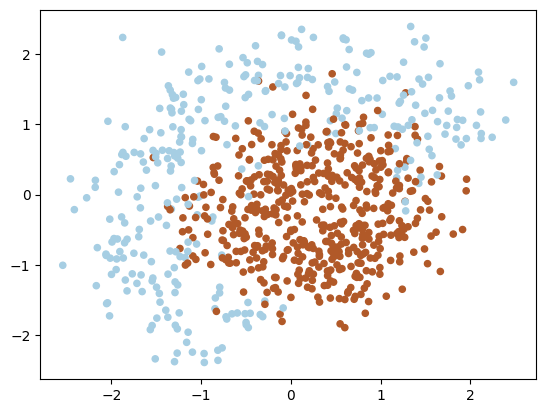

In [664]:
from sklearn import datasets, preprocessing

(XX, yy) = datasets.make_circles(n_samples=1024, shuffle=True, 
                               noise=0.2, factor=0.4, random_state=42)

ind = np.logical_or(yy == 1, XX[:, 1] > XX[:, 0] - 0.5)
XX = XX[ind, :]
# m = np.array([[1, 1], [-2, 1]])
XX = preprocessing.scale(XX)
yy = yy[ind]

plt.scatter(XX[:, 0], XX[:, 1], c=yy, cmap=plt.cm.Paired, s=20)
plt.show()

In [665]:
XX = torch.from_numpy(XX)
yy = torch.from_numpy(yy)

dataset = torch.cat((XX, torch.reshape(yy, (-1,1))), dim = 1)
dataset[0:600]

tensor([[ 1.2080,  0.0845,  1.0000],
        [ 0.7612,  0.7251,  1.0000],
        [ 0.5526,  0.5194,  1.0000],
        ...,
        [ 0.1689,  1.4121,  1.0000],
        [ 0.0765,  1.5942,  0.0000],
        [ 0.8697, -0.6335,  1.0000]], dtype=torch.float64)

__[0.25 балла]__ Рзбейте выборку на обучающую, валидационную и тестовую. Для обучающей и валидационной выборок заведите Dataset и DataLoader: 

- для обучающей: итератор должен перемешивать выборку каждую эпоху и генерировать батчи размера $32$
- для валидационной: итератор должен генировать батчи размера $32,$ данные перемешивать не надо
- про тестовую выборку пока что забудьте

In [666]:
# your code here  ლ(ಠ益ಠლ)
dataset_train = dataset[0:600]
dataset_valid = dataset[600:750]
dataset_test = dataset[750:]
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=32, shuffle=True)
loader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=1000, shuffle=False)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=1000, shuffle=False)

__[0.25 балла]__ реализуйте на PyTorch функцию для поиска вероятности того, что объект относится к первому классу.


$$ \hat{y} = \langle w, x \rangle $$
$$ P( y=1 \; \big| \; x, \, w) = \dfrac{1}{1 + \exp(- \langle w, x \rangle)} = \sigma(\langle w, x \rangle)$$

Обратите внимание, что по весам мы будем искать градиенты.

In [667]:
w = torch.randn(2, requires_grad=True)

def probability(X):
    return 1/(1+torch.exp(-(X*w).sum(dim=1)))
    # your code here  ( ͡° ͜ʖ ͡°)
    pass

Для логистической регрессии оптимальный параметр находится минимизацией кросс-энтропии (или logloss): 

$$ L(w) =  - {1 \over n} \sum_{i=1}^n \left[ {y_i \cdot log P(y_i = 1 \, | \, x_i,w) + (1-y_i) \cdot log (1-P(y_i = 1 \, | \, x_i,w))}\right] $$


__[0.25 балла]__ реализуйте в PyTorch эту функцию потерь. Пользоваться готовыми функциями потерь вроде `CrossEntropyLoss()` нельзя. Надо вбить самостоятельно. Для значений $y$, для удобства, можно сделать One Hot Encoding.

In [668]:
def compute_loss(X, y):
    d = (y*torch.log(probability(X)) + (y-1)*torch.log(1 - probability(X) + 0.0001)).sum()
    n=y.shape[0]
    return -d/n
    # your code here  ( ཀ ʖ̯ ཀ)
    pass

__[0.5 балла]__ Напишите функцию, которая делает один шаг обучения логистической регрессии. Для градиентного спуска используйте в качестве оптимизатора `SGD`. 

In [669]:
def train_step(X, y):
    # your code here  ¯\_(ツ)_/¯
    
    loss = compute_loss(X, y)
    loss.backward()
    w.data -= 0.03 * w.grad.data 
    w.grad.data.zero_()
    pass

__[1 балл]__ Напишите цикл для обучения модели. Цикл должен делать $1000$ итераций. В случае, если ошибка на валидационной выборке начала расти и растёт в течение $20$ эпох, обучение должно останавливаться. Такая стратегия обучения называется ранней остановкой (early stopping).

In [670]:
EPOCH = 300
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []
test_loss_old = 0
loss_grow_count = -100

for i in range(EPOCH):
    train_loss, train_accuracy = 0.0, 0.0
    
    for Batch in loader_train:

        X_batch = Batch[:,:2]
        y_batch = Batch[:,2].int()
        pred = probability(X_batch)
        loss = compute_loss(X_batch, y_batch)
        train_step(X_batch, y_batch)
        
        train_loss += loss.item() * X_batch.shape[0]
        train_accuracy += ((pred+y_batch)>=1.5).sum().item()
        train_accuracy += ((pred+y_batch)<0.5).sum().item()
        
    train_losses.append(train_loss)
    n_train = len(loader_train.dataset)
    train_accuracies.append(train_accuracy/n_train)

    test_loss, test_accuracy = 0.0, 0.0
    
    for Batch in loader_valid:
        X_batch = Batch[:,:2]
        y_batch = Batch[:,2].int()
        prediction = probability(X_batch)
        loss = compute_loss(X_batch, y_batch)

    test_loss += loss.item() * X_batch.shape[0]
    test_losses.append(test_loss)

    test_accuracy += ((prediction+y_batch)>=1.5).sum().item()
    test_accuracy += ((prediction+y_batch)<0.5).sum().item()
    n_test = len(loader_train.dataset)
    test_accuracies.append(test_accuracy/n_test)
    
    if test_loss_old<=test_loss:
        loss_grow_count+=1
    else: loss_grow_count = 0
    test_loss_old = test_loss
    if loss_grow_count == 21: break

0
24.1329356819559
-100
_____________________________________________________
24.1329356819559
23.42938860255011
-99
_____________________________________________________
23.42938860255011
22.703437634164324
0
_____________________________________________________
22.703437634164324
21.926006198200287
0
_____________________________________________________
21.926006198200287
21.122243571730387
0
_____________________________________________________
21.122243571730387
20.295083183027046
0
_____________________________________________________
20.295083183027046
19.458760905774444
0
_____________________________________________________
19.458760905774444
18.593878848881623
0
_____________________________________________________
18.593878848881623
17.696621157869362
0
_____________________________________________________
17.696621157869362
16.804164149717206
0
_____________________________________________________
16.804164149717206
15.88546385028242
0
_______________________________________

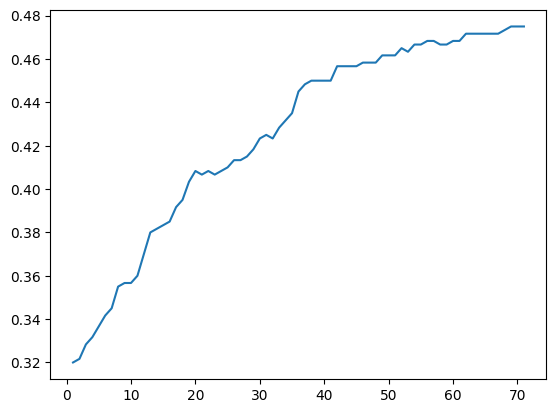

In [671]:
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')

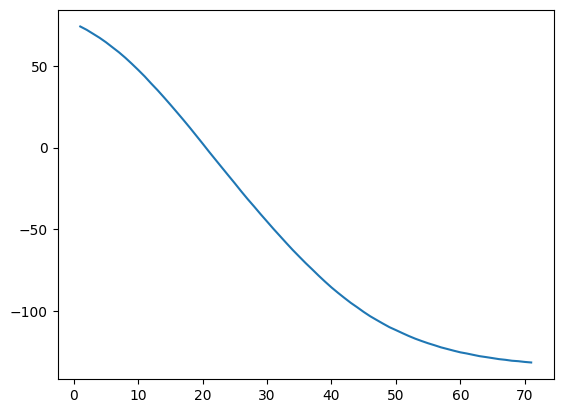

In [672]:
plt.plot(range(1, len(train_losses) + 1), train_losses, label='train')

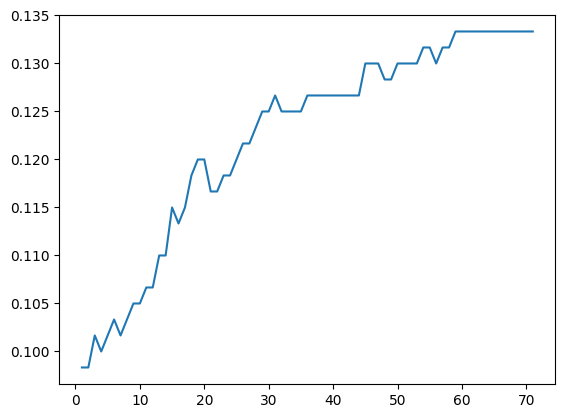

In [673]:
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')

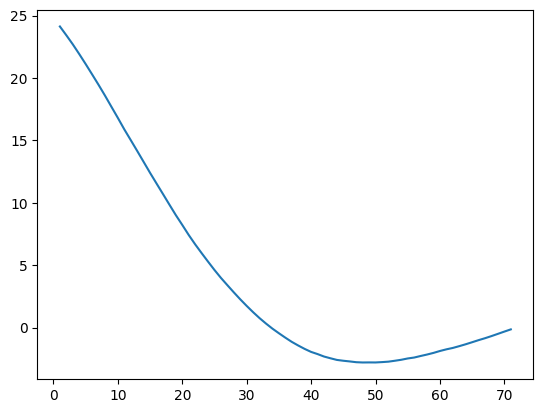

In [674]:
plt.plot(range(1, len(test_losses) + 1), test_losses, label='test')

__[0.25 балла]__ Измерите качество итоговой модели на тестовой выборке. 

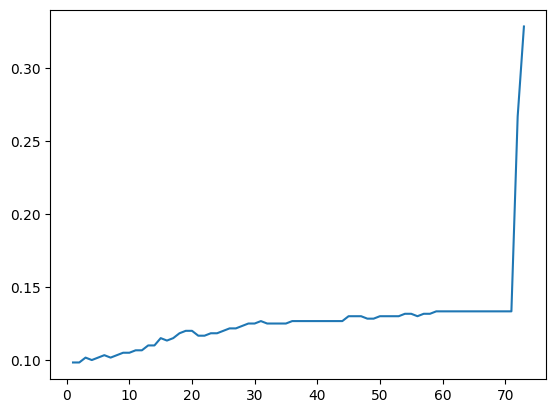

In [676]:
# your code here  (ﾉ´ з `)ノ
for Batch in loader_test:
    X_batch = Batch[:,:2]
    y_batch = Batch[:,2].int()
    prediction = probability(X_batch)

    test_accuracy += ((prediction+y_batch)>=1.5).sum().item()
    test_accuracy += ((prediction+y_batch)<0.5).sum().item()
    n_test = len(loader_train.dataset)
    test_accuracies.append(test_accuracy/n_test)

plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')

# 3. Собираем нейросеть

В этом задании мы попробуем обучить нейросеть предсказывать цены на недвижимость в Бостоне.

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [677]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
target = data['MEDV']
data.drop(columns = ['MEDV'], inplace=True)

X = np.array(data)
y = np.array(target)

In [678]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((455, 13), (51, 13))

__[0.25 балла]__ Отнормируйте данные.

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train_norm = ... # your code here ( ￣ー￣)
X_test_norm = ...

__[0.25 балла]__ Найдите медианную цену на обучающей выборке. Используйте её в качестве прогноза. Какое качество в терминах метрики $MAPE$ получается на тестовой выборке? Для всех дальнейших вопросах о качестве используйте эту метрику.

In [ ]:
# your code here  ヾ(๑╹◡╹)ﾉ

__[0.5 балла]__ Подгрузите из sklearn модель линейной регрессии и модель случайного леса. Обучите их на наших данных. Какое качество у них получилось на тестовой выборке? Какой функционал они используют для обучения?

In [ ]:
# your code here  (๑-﹏-๑)

__[0.5 балла]__ Менеджер Николай обладает гуманитарным образованием. Он спрашивает вас, насколько хорошими получились модели. Объясните ему это так, чтобы он понял.

__Ответ:__  напишите тут текст

In [ ]:
# your code here  (｡•́︿•̀｡)

__[0.5 балла]__ Реализуйте линейную регрессию в виде нейронной сети. Для этого используйте один полносвязный слой без функции активации.

Обучите её, использая Adam в качестве оптимизатора и $MSE$ в качестве функции потерь. Сравните получившиеся значения коэффициентов с тем, что получилось при обучении модели средствами sklearn. Сравнение делаете с помощью какого-нибудь графика. 

In [ ]:
# your code here  (ಥ﹏ಥ)

__[0.5 балла]__ Реализуйте две разных архитектуры нейросетей, которые принципиально отличаются друг от друга. Обучите каждую из них с двумя оптимизаторами: Adam и SGD. Визуализируйте все траектории обучения на картинке. 

Не забывайте отщипнуть в рамках этого метода от обучающей выборки кусочек для валидации. Тестовую выборку мы будем использовать только для итоговой оценки качества. 

In [ ]:
# your code here  (ﾉ◕ヮ◕)ﾉ

__[1 балл]__ Потратьте некоторое время на модернизацию своих архитектур. Попытайтесь побить качество, которое дал случайный лес. Опишите здесь свои эксперименты что/как/почему вы пробовали. Оставьте в виде кода реализацию лучшей модели. 

__Добавлять сюда описание своих экспериментов в виде текста - обязательно! Без этого полного балла не будет.__

In [ ]:
# your code here  ٩(⁎❛ᴗ❛⁎)۶

__[0.5 балла]__ Возьмите лучшую из получившихся у вас моделей. Обучите её на неотнормированных данных и на отнормированных данных. Визуализируйте траектории обучения обеих моделей на одной картинке.

In [ ]:
# your code here  (︺︹︺)

__[0.25 балла]__ Какое поведение в этих траекториях вы ожидали увидеть? Какое поведение вы увидели в реальности? Как думаете, почему траектории ведут себя именно так? При обучении моделей выше мы использовали $MSE$. Какой есть минус у этого функционала? 

__Ответ:__

In [ ]:
# your code here ʕ•ᴥ•ʔ

__[1 балл]__  Давайте попробуем обучить ту же самую модель, используя в качестве функций потерь другие функционалы: 

- MAE
- MSLE
- LogCosh 

Каким оказывается MAPE на тестовой выборке для всех трёх случаев?

In [ ]:
# your code here  ♪┏(・o･)┛♪

__[0.25 балла]__ Какой смысл кроется за этими функциями потерь? Как думаете, какая из них лучше всего подходит для решения нашей задачи? Объясните почему. 

В этом вам поможет [глава из книги Александра Дьяконова](https://alexanderdyakonov.files.wordpress.com/2018/10/book_08_metrics_12_blog1.pdf) и [конспект из курса МО-1 Жени Соколова](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/lecture-notes/lecture02-linregr.pdf)

__Ответ:__

> Нейронные сети не очень хорошо показывают себя на табличных данных из-за их разнородности. С такими задачами обычно хорошо справляется градиентный бустинг. Нейронные сети больше подходят для работы с картинками и текстами.

**[Бонус (0.1 балла)]**  Прикрепите фотографию того, как вы начали этот февраль. Какую самую классную эмоцию вы испытали за прошедший месяц?

__место для картики и эмоции__


# 4. Бонусный трэк: градиентные спуски

В этом разделе вы можете попробовать самостоятельно реализовать разные виды градиентных спусков для логистической регрессии. В PyTorch многие оптимизаторы уже реализованы и нам остаётся их только использовать. Тут мы реализуем все эти оптимизаторы с нуля. 

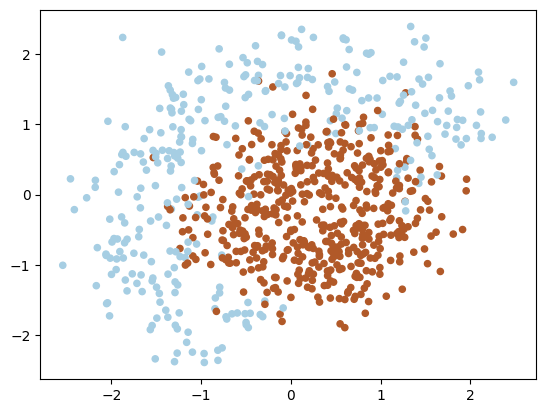

In [4]:
from sklearn import datasets, preprocessing

(X, y) = datasets.make_circles(n_samples=1024, shuffle=True, 
                               noise=0.2, factor=0.4, random_state=42)

ind = np.logical_or(y == 1, X[:, 1] > X[:, 0] - 0.5)
X = X[ind, :]
m = np.array([[1, 1], [-2, 1]])
X = preprocessing.scale(X)
y = y[ind]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.show()

In [5]:
# добавим вектор из единичек
X = np.hstack((X, np.ones(X.shape[0])[:,np.newaxis]))
X

array([[ 1.20798057,  0.0844994 ,  1.        ],
       [ 0.76121787,  0.72510869,  1.        ],
       [ 0.55256189,  0.51937292,  1.        ],
       ...,
       [-1.22224754,  0.45743421,  1.        ],
       [ 0.43973452, -1.47275142,  1.        ],
       [ 1.4928118 ,  1.15683375,  1.        ]])

__[0.2 балла]__ реализуйте в `numpy` функцию для поиска вероятности того, что объект относится к первому классу


$$ \hat{y} = \langle w, x \rangle $$
$$ P( y=1 \; \big| \; x, \, w) = \dfrac{1}{1 + \exp(- \langle w, x \rangle)} = \sigma(\langle w, x \rangle)$$

Обратите внимание, что веса теперь идут на вход в эту функцию. 

In [6]:
def probability(X, w):
    # your code here   ฅ^•ﻌ•^ฅ 
     pass

In [7]:
inp_test = np.array([[1,2], [3,4]])
out_test = np.array([1, 0])
weight_test = np.array([0.5, 0.5])

assert np.allclose(probability(inp_test, weight_test), np.array([0.81757448, 0.97068777]))

__[0.2 балла]__ По аналогии реализуйте логистические потери. 

$$ L(w) =  - {1 \over n} \sum_{i=1}^n \left[ {y_i \cdot log P(y_i = 1 \, | \, x_i,w) + (1-y_i) \cdot log (1-P(y_i = 1 \, | \, x_i,w))}\right] $$

In [8]:
def compute_loss(X, y, w):
    # your code here  ᕕ(꒪𖤋꒪')ᕗ
    pass

In [9]:
assert compute_loss(inp_test, out_test, weight_test) - 1.865581 < 1e-3

__[0.4 балла]__ Мы будем обучать модель методом градиентного спуска своими руками. Для этого нам придётся вычислить градиент функции потерь, представленной выше. Возьмите листочек, ручку и в бой! 

$$ \nabla_w L = ...$$

In [10]:
def compute_grad(X, y, w):
    """
    Нахоит значение градиента.
    """

    # your code here  ᔑ••ᔐ
    pass

In [11]:
assert np.allclose(compute_grad(inp_test, out_test, weight_test), np.array([1.36481889, 1.75895001]))

Функция ниже предназначена для визуализации процесса обучения. 

In [12]:
from IPython import display

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def visualize(X, y, w, history):
    """С помощью магии matplolib выдаёт красоты результатов классификации"""
    Z = probability(np.c_[xx.ravel(), yy.ravel()], w[:-1])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,3))
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.subplot(1, 2, 2)
    plt.plot(history)
    plt.grid()
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    plt.show()

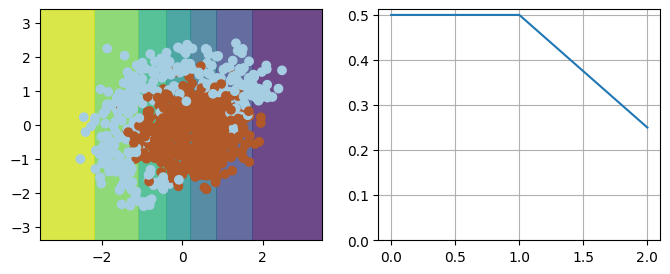

In [13]:
dummy_weights = np.linspace(-1, 1, 3)
visualize(X, y, dummy_weights, [0.5, 0.5, 0.25])

Пришло время обучить нашу модель. Для этого вам придётся дописать кусочки функций ниже. Обязательно попробуйте поменять гиперпараметры (размер батча и скорость обучения) и посмотреть как будет изменяться анимация. 

### [0.4  балла] Mini-batch SGD

Берём несколько рандомных наблюдений и ищем градиент по ним! 

$$ w_t = w_{t-1} - \eta \dfrac{1}{m} \sum_{j=1}^m \nabla_w L(w_t, x_{i_j}, y_{i_j}) $$



In [ ]:
np.random.seed(42)
w = np.array([0, 0, 1.])

eta= 0.1 

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    
    # your code here  ( .-. )

visualize(X, y, w, loss)
plt.clf()

### [0.4 балла] Momentum SGD

Momentum это метод, который помогает стохастическому градиентному спуску сохранять направление движения. Это осуществляется за счёт добавления в выражение дополнительного слагаемого: накопленного за предыдущие шаги градиента с весом $\alpha$. 
<br>
<br>

$$ \nu_t = \alpha \nu_{t-1} + \eta\dfrac{1}{m} \sum_{j=1}^m \nabla_w L(w_t, x_{i_j}, y_{i_j}) $$
$$ w_t = w_{t-1} - \nu_t$$


In [ ]:
np.random.seed(42)
w = np.array([0, 0, 1.])

eta = 0.05 
alpha = 0.9 
nu = np.zeros_like(w)

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    
    # your code here  |∴め ϖ め∴|

visualize(X, y, w, loss)
plt.clf()

### [0.4 балла] RMSprop

В этом блоке реализуем RMSprop. Эта вариация градиентного спуска позволяет изменять скорость обучения индивидуально для каждого параметра. 

$$ G_t^j = \alpha G_{t-1}^j + (1 - \alpha) g_{tj}^2 $$
$$ w_t^j = w_{t-1}^j - \dfrac{\eta}{\sqrt{G_t^j + \varepsilon}} g_{tj} $$

In [ ]:
np.random.seed(42)

w = np.array([0, 0, 1.])

eta = 0.1 
alpha = 0.9 
g2 = np.zeros_like(w)
eps = 1e-8

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):

    # your code here  ( ᵒ̴̶̷̥́ ·̫ ᵒ̴̶̷̣̥̀ )

visualize(X, y, w, loss)
plt.clf()

Как траектории обучения различных вариаций градиентного спуска различаются между собой? Ожидаемо ли это? Почему? Что нужно сделать, чтобы реализовать Adam? 